<h1>
<strong>Project 1</strong>
</h1>
<h2>
Tron Schell - Rochester Insitutue of Technology
</h2>
<h3>
Part 1: Data Cleaning <br \>
Part 2: Exploratory Data Analysis <br />
Part 3: Predictive Modeling
</h3>

<h1>
<strong>Part 1: Data Cleaning</strong>
</h2>

In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

<h3>
Read in the CSV file, set the index to the name of the cars as there is no unique identifier. <br \>
Show the first 5 rows.
<h3>

In [231]:
data = pd.read_csv('Cheapestelectriccars-EVDatabase.csv')
data.set_index('Name')
data.head()

Name  \
0                    Opel Ampera-e    
1         Renault Kangoo Maxi ZE 33   
2                      Nissan Leaf    
3  Audi e-tron Sportback 55 quattro   
4            Porsche Taycan Turbo S   

                                    Subtitle Acceleration  TopSpeed   Range  \
0   Battery Electric Vehicle |       58 kWh       7.3 sec  150 km/h  335 km   
1   Battery Electric Vehicle |       31 kWh      22.4 sec  130 km/h  160 km   
2   Battery Electric Vehicle |       36 kWh       7.9 sec  144 km/h  220 km   
3  Battery Electric Vehicle |       86.5 kWh      5.7 sec  200 km/h  375 km   
4  Battery Electric Vehicle |       83.7 kWh      2.8 sec  260 km/h  390 km   

  Efficiency FastChargeSpeed              Drive  NumberofSeats PriceinGermany  \
0  173 Wh/km        210 km/h  Front Wheel Drive              5        €42,990   
1  194 Wh/km               -  Front Wheel Drive              5            NaN   
2  164 Wh/km        230 km/h  Front Wheel Drive              5        €29,990   
3  231 Wh/km        600 km/h    All Wheel Drive              5            NaN   
4  215 Wh/km        860 km/h    All Wheel Drive              4       €186,336   

  PriceinUK  
0       NaN  
1   £31,680  
2   £25,995  
3   £79,900  
4  £138,830

<h3>
We have to rename all of the columns in the dataset because we want to get rid of the units within the columns to make the datatypes usable for graphing.
</h3>

In [232]:
renamed_data = data.rename(columns={'Acceleration':'Acceleration (sec)', 'TopSpeed':'TopSpeed (km/h)', 'Range':'Range (km)', 'Efficiency':'Efficiency (Wh/km)', 'FastChargeSpeed':'FastChargeSpeed (km/h)', 'PriceinGermany':'PriceinGermany (€)', 'PriceinUK':'PriceinUK (£)'})
renamed_data['Acceleration (sec)'] = renamed_data['Acceleration (sec)'].str.replace('sec', '')
renamed_data['TopSpeed (km/h)'] = renamed_data['TopSpeed (km/h)'].str.replace('km/h', '')
renamed_data['Range (km)'] = renamed_data['Range (km)'].str.replace('km', '')
renamed_data['Efficiency (Wh/km)'] = renamed_data['Efficiency (Wh/km)'].str.replace('Wh/km', '')
renamed_data['FastChargeSpeed (km/h)'] = renamed_data['FastChargeSpeed (km/h)'].str.replace('km/h', '')
renamed_data['FastChargeSpeed (km/h)'] = renamed_data['FastChargeSpeed (km/h)'].str.replace('-', 'NaN')
renamed_data['PriceinGermany (€)'] = renamed_data['PriceinGermany (€)'].str.replace('€', '')
renamed_data['PriceinGermany (€)'] = renamed_data['PriceinGermany (€)'].str.replace(',', '')
renamed_data['PriceinUK (£)'] = renamed_data['PriceinUK (£)'].str.replace('£', '')
renamed_data['PriceinUK (£)'] = renamed_data['PriceinUK (£)'].str.replace(',', '')
#renamed_data.iloc[35:48]

<h3>
Drop all of the columns with NULL values, then convert columns into their respective datatypes for use in graphing
</h3>

In [321]:
dropped = renamed_data.dropna()
#dropped.info()
dropped['Acceleration (sec)'] = dropped['Acceleration (sec)'].astype(float)
dropped['TopSpeed (km/h)'] = dropped['TopSpeed (km/h)'].astype(float)
dropped['Range (km)'] = dropped['Range (km)'].astype(float)
dropped['Efficiency (Wh/km)'] = dropped['Efficiency (Wh/km)'].astype(float)
dropped['FastChargeSpeed (km/h)'] = dropped['FastChargeSpeed (km/h)'].astype(float)
dropped['PriceinGermany (€)'] = dropped['PriceinGermany (€)'].astype(float)
dropped['PriceinUK (£)'] = dropped['PriceinUK (£)'].astype(float)

dropped = dropped.dropna()

dropped.dtypes

/var/folders/6q/112b_g4d25x30bfwwj9_ngrr0000gn/T/ipykernel_87328/2101947198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['Acceleration (sec)'] = dropped['Acceleration (sec)'].astype(float)
/var/folders/6q/112b_g4d25x30bfwwj9_ngrr0000gn/T/ipykernel_87328/2101947198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['TopSpeed (km/h)'] = dropped['TopSpeed (km/h)'].astype(float)
/var/folders/6q/112b_g4d25x30bfwwj9_ngrr0000gn/T/ipykernel_87328/2101947198.py:5: SettingWithCopyWarning: 
A v

Name                       object
Subtitle                   object
Acceleration (sec)        float64
TopSpeed (km/h)           float64
Range (km)                float64
Efficiency (Wh/km)        float64
FastChargeSpeed (km/h)    float64
Drive                      object
NumberofSeats               int64
PriceinGermany (€)        float64
PriceinUK (£)             float64
dtype: object

<h3>
Visually show if there is any columns that are NULL.
</h3>

<AxesSubplot:>

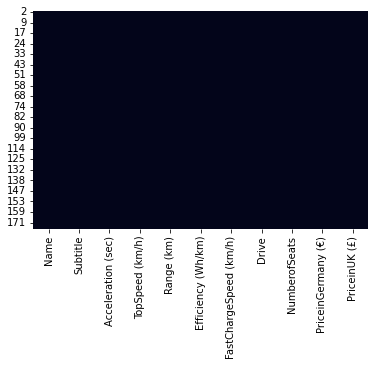

In [234]:
sns.heatmap(dropped.isnull(), cbar=False)

<h2>
<strong>Part 2: Exploratory Data Analysis</strong>
</h2>

<h3>Shows an exponential decrease in price in UK Pounds as Acceleration increases (takes more time to accelerate the vehicle)</h3>

<AxesSubplot:xlabel='Acceleration (sec)', ylabel='PriceinUK (£)'>

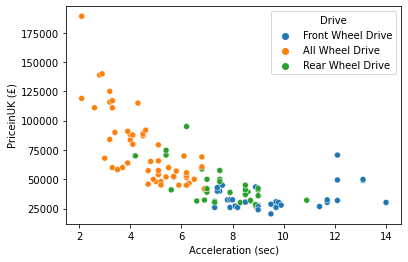

In [235]:
sns.scatterplot(data=dropped, x='Acceleration (sec)', y='PriceinUK (£)', hue='Drive')

<h3>To see if price action is generally the same between Germany and the UK, we also take a look at the relationship between German Franks and Acceleration as it increases. <br /> <br />As Acceleration increases (takes more time to accelerate the vehicle), the price exponentially decreases.</h3>

<AxesSubplot:xlabel='Acceleration (sec)', ylabel='PriceinGermany (€)'>

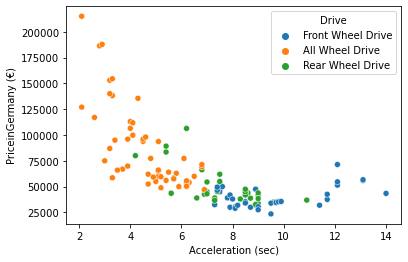

In [236]:
sns.scatterplot(data=dropped, x='Acceleration (sec)', y ='PriceinGermany (€)', hue='Drive')

<AxesSubplot:xlabel='Acceleration (sec)', ylabel='Range (km)'>

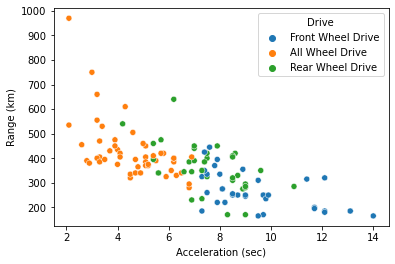

In [237]:
sns.scatterplot(data=dropped, x='Acceleration (sec)', y='Range (km)', hue='Drive')

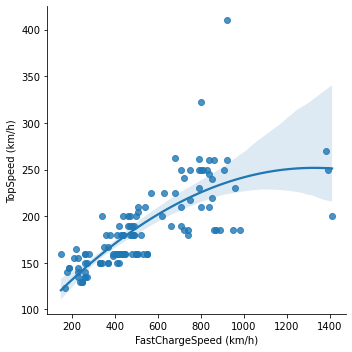

In [238]:
#sns.scatterplot(data=dropped, x='FastChargeSpeed (km/h)', y='TopSpeed (km/h)', hue='Drive')
sns.lmplot(x='FastChargeSpeed (km/h)', y='TopSpeed (km/h)', data=dropped, order=2)


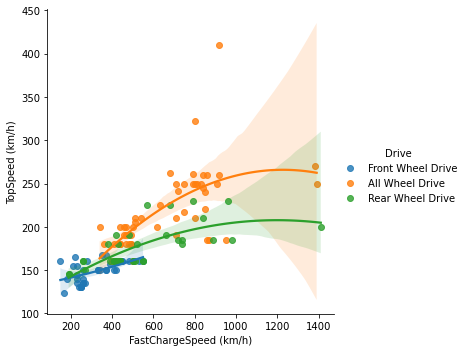

In [239]:
sns.lmplot(x='FastChargeSpeed (km/h)', y='TopSpeed (km/h)', data=dropped, order=2, hue='Drive')

<h3>
This is a "Correlation Matrix" which allows us to see general trends. Correlation allows us to see if does or doesn't have a linear relationship.
</h3>

<AxesSubplot:>

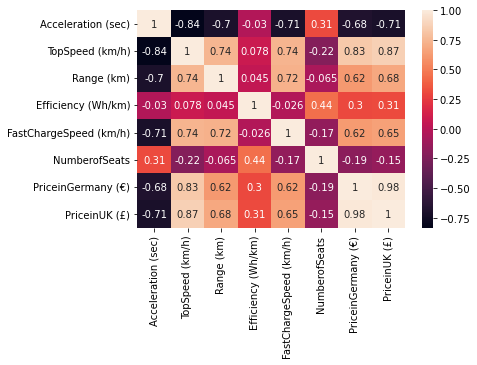

In [240]:
correlation_matrix = dropped.corr()
dropped.head()

sns.heatmap(correlation_matrix, annot=True)


<h3>
This is called a "Pairplot" or a "Scatter Matrix". It allows us to see all of the scatter plots in relation to everything in the dataset. This gives a good overview of everything inside of the dataset and allows us to make quicker insights into our data as eveything is presented to us.
</h3>

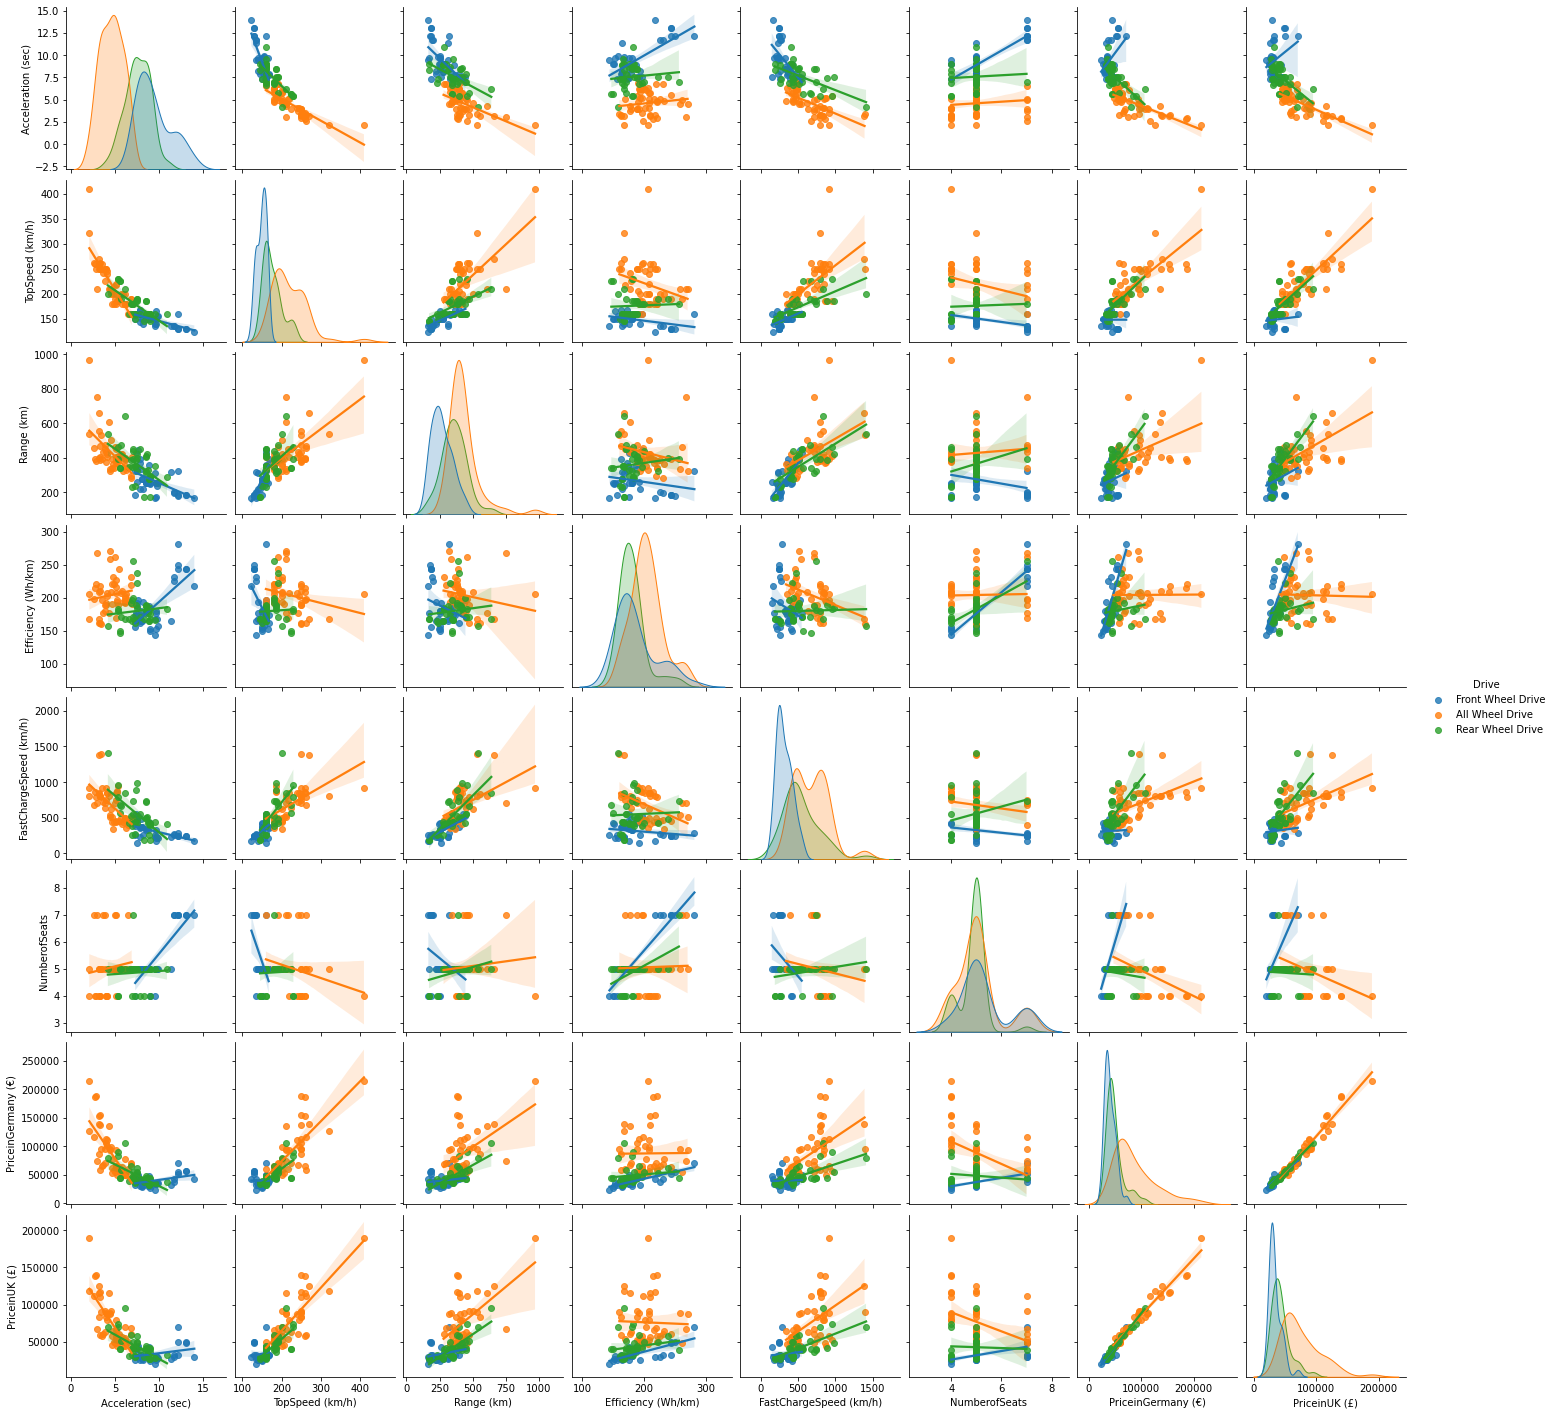

In [241]:
sns.pairplot(dropped, hue='Drive', kind='reg')

<h1><strong>Part 3: Predictive Modeling</strong></h1>

<h3>Change the Drive column from strings to a integers and change its datatype as the machine learning algorithm we are going to use cannot understand anything but numerical values.</h3>

In [242]:
dropped['Drive'] = dropped['Drive'].str.replace('Front Wheel Drive', '0')
dropped['Drive'] = dropped['Drive'].str.replace('All Wheel Drive', '1')
dropped['Drive'] = dropped['Drive'].str.replace('Rear Wheel Drive', '2')

dropped['Drive'] = dropped['Drive'].astype('int')

<h3>Checking the dataypes to see what to exclude within the model</h3>

In [243]:
dropped.head()
dropped.dtypes

Name                       object
Subtitle                   object
Acceleration (sec)        float64
TopSpeed (km/h)           float64
Range (km)                float64
Efficiency (Wh/km)        float64
FastChargeSpeed (km/h)    float64
Drive                       int64
NumberofSeats               int64
PriceinGermany (€)        float64
PriceinUK (£)             float64
dtype: object

<h3>Split the "dropped" dataframe into a features variable (X), and a target variable (Y).</h3>

In [249]:
X = dropped.drop(['PriceinGermany (€)', 'PriceinUK (£)', 'Name', 'Subtitle'], axis=1)
y = dropped['PriceinGermany (€)']

<h3>Instantiate a LinearRegression model and use 5 fold cross validation to ensure that all training data is used. Then we will score based on the <strong>mean</strong> of the cross validation scores.<br /><br />Then we will predict on our test set we created when we split our data..</h3>

In [315]:
lm = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm_cv = cross_val_score(lm, X_train, y_train, cv=5)

print(lm_cv.mean())
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print(predictions)



0.7441292945332434
[ 60103.08414994  80221.79701424  52864.78334514  37799.54136749
  47372.60428851  30792.31855985  39703.0535346   31349.26092083
  48241.10819729  54368.24471624  79322.2572062   58431.13711982
  44898.10116205 115296.98607951  75509.21744062  35884.97199927
 121009.77020297  70707.43563062  24291.10645559  59075.3445598
 102368.11006381  35884.97199927  26204.35116953  38978.18747952
  84408.74629647]


<h3>Here we are going to test our data with a new set of data we are going to randomly create.</h3>

In [339]:
new_data = {'Acceleration (sec)':[7.12], 'TopSpeed (km/h)':[170.0], 'Range (km)':[300.0], 'Efficiency (Wh/km)': [200.0], 'FastChargeSpeed (km/h)':[450.0],'Drive':[1], 'NumberofSeats':[5]}
new_df = pd.DataFrame(new_data)
#new_df.info()

print('Price of our fictional car in Euros: ' , lm.predict(new_df)[0])

Price of our fictional car in Euros:  55263.60708154141
